# [CNN](https://github.com/kokchun/Deep-learning-AI21/blob/main/Lectures/Lec3-CNN_intro.ipynb) 

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets.cifar10 import load_data
import os

In [10]:
(X_train, y_train), (X_test, y_test) = load_data()
print(y_train)
y_train, y_test = y_train.ravel(), y_test.ravel()
print(y_train)
print(f"{X_train.shape=}, {X_test.shape=}\n{y_train.shape=}, {y_test.shape=}")

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
[6 9 9 ... 9 1 1]
X_train.shape=(50000, 32, 32, 3), X_test.shape=(10000, 32, 32, 3)
y_train.shape=(50000,), y_test.shape=(10000,)


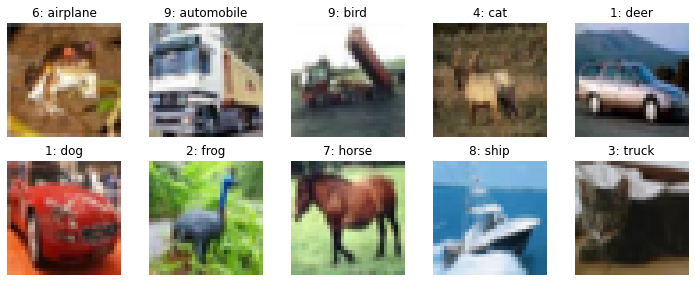

In [11]:
labels = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

labels_dict = {i: label for i, label in enumerate(labels)}

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i])
    ax.axis("off")
    ax.set_title(f"{y_train[i]}: {labels_dict[i]}")
fig.tight_layout()

In [12]:
scaled_X_train = X_train.astype('float32')/255
scaled_X_test = X_test.astype('float32')/255

## CNN Model

In [15]:
X_train.shape[1:]

(32, 32, 3)

In [16]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam

def CNN_model(learning_rate=.001, drop_rate=.5, kernels=[32,64]):
    adam = Adam(learning_rate=learning_rate)
    model = Sequential(name='cnn_model')

    for number_kernel in kernels:
        conv_layer = Conv2D(number_kernel, kernel_size = (3,3), activation='relu', kernel_initializer='he_normal', input_shape=X_train.shape[1:])
        model.add(conv_layer)
        model.add(MaxPooling2D(pool_size=(2,2), strides=2))

    model.add(Flatten())
    model.add(Dropout(drop_rate))
    model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['acc'])

    return model

In [31]:
model = CNN_model()
model.summary()

Model: "cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2304)              0         
                                                                 
 dropout_3 (Dropout)         (None, 2304)              0 

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopper = EarlyStopping(monitor='val_loss', mode='min', patience=5)

model.fit(scaled_X_train, y_train, epochs=100, callbacks=[early_stopper], validation_split=1/5)

Epoch 1/100


2022-04-27 11:27:40.405650: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1250/1250 [==============================] - ETA: 0s - loss: 1.5342 - acc: 0.4431

2022-04-27 11:27:49.643081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1250/1250 [==============================] - 11s 8ms/step - loss: 1.5342 - acc: 0.4431 - val_loss: 1.2087 - val_acc: 0.5764
Epoch 2/100
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1871 - acc: 0.5795 - val_loss: 1.0563 - val_acc: 0.6369
Epoch 3/100
1250/1250 [==============================] - 9s 7ms/step - loss: 1.0448 - acc: 0.6312 - val_loss: 0.9757 - val_acc: 0.6683
Epoch 4/100
1250/1250 [==============================] - 9s 7ms/step - loss: 0.9447 - acc: 0.6685 - val_loss: 0.9102 - val_acc: 0.6896
Epoch 5/100
1250/1250 [==============================] - 9s 7ms/step - loss: 0.8603 - acc: 0.7005 - val_loss: 0.8937 - val_acc: 0.6946
Epoch 6/100
1250/1250 [==============================] - 9s 7ms/step - loss: 0.7930 - acc: 0.7216 - val_loss: 0.8752 - val_acc: 0.7006
Epoch 7/100
1250/1250 [==============================] - 9s 7ms/step - loss: 0.7366 - acc: 0.7395 - val_loss: 0.8289 - val_acc: 0.7183
Epoch 8/100
1250/1250 [==============================] - 9s 7ms/st

In [36]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1,2,figsize=(12,4))
    metrics[['loss', 'val_loss']].plot(ax=ax[0], grid=True)
    metrics[['acc', 'val_acc']].plot(ax=ax[1], grid=True)

In [34]:
metrics = pd.DataFrame(model.history.history)

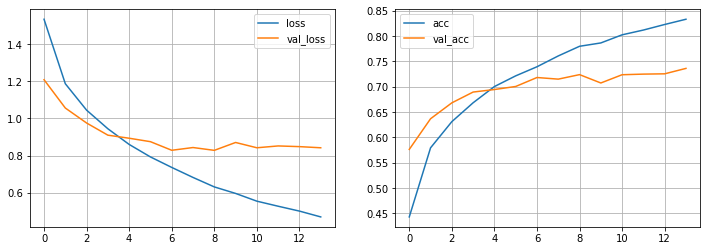

In [37]:
plot_metrics(metrics)

## Hyperparameter tuning

In [39]:
def evaluate_model(**kwargs):
    model = CNN_model(**kwargs)
    model.fit(scaled_X_train, y_train, validation_split=1/5, epochs=6)
    metrics = pd.DataFrame(model.history.history)
    val_acc = metrics['val_acc'].iloc[-1]
    return val_acc

In [45]:
dropout_accuracies = {}
for drop_rate in np.arange(.1, .6, .1):
    # because of floating point precision
    drop_rate = np.round(drop_rate,1) 
    dropout_accuracies[drop_rate] = evaluate_model(drop_rate = drop_rate)

Epoch 1/6
   8/1250 [..............................] - ETA: 10s - loss: 3.6625 - acc: 0.1250 

2022-04-27 11:43:53.918693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1242/1250 [============================>.] - ETA: 0s - loss: 1.4517 - acc: 0.4833

2022-04-27 11:44:02.338089: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1250/1250 [==============================] - 10s 8ms/step - loss: 1.4508 - acc: 0.4837 - val_loss: 1.1913 - val_acc: 0.5731
Epoch 2/6
1250/1250 [==============================] - 9s 7ms/step - loss: 1.0790 - acc: 0.6201 - val_loss: 1.0335 - val_acc: 0.6440
Epoch 3/6
1250/1250 [==============================] - 9s 7ms/step - loss: 0.9089 - acc: 0.6822 - val_loss: 0.9868 - val_acc: 0.6595
Epoch 4/6
1250/1250 [==============================] - 9s 7ms/step - loss: 0.7836 - acc: 0.7252 - val_loss: 0.8987 - val_acc: 0.6969
Epoch 5/6
1250/1250 [==============================] - 9s 7ms/step - loss: 0.6735 - acc: 0.7642 - val_loss: 0.9232 - val_acc: 0.6902
Epoch 6/6
1250/1250 [==============================] - 9s 7ms/step - loss: 0.5772 - acc: 0.7984 - val_loss: 0.9336 - val_acc: 0.6950
Epoch 1/6
  14/1250 [..............................] - ETA: 9s - loss: 2.6241 - acc: 0.1607 

2022-04-27 11:44:48.904534: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1247/1250 [============================>.] - ETA: 0s - loss: 1.4319 - acc: 0.4841

2022-04-27 11:44:56.912742: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1250/1250 [==============================] - 9s 7ms/step - loss: 1.4315 - acc: 0.4841 - val_loss: 1.1768 - val_acc: 0.5888
Epoch 2/6
1250/1250 [==============================] - 9s 7ms/step - loss: 1.0790 - acc: 0.6215 - val_loss: 1.0132 - val_acc: 0.6402
Epoch 3/6
1250/1250 [==============================] - 9s 7ms/step - loss: 0.9271 - acc: 0.6746 - val_loss: 0.9859 - val_acc: 0.6595
Epoch 4/6
1250/1250 [==============================] - 9s 7ms/step - loss: 0.8041 - acc: 0.7179 - val_loss: 0.9437 - val_acc: 0.6788
Epoch 5/6
1250/1250 [==============================] - 9s 7ms/step - loss: 0.7037 - acc: 0.7502 - val_loss: 0.9245 - val_acc: 0.6861
Epoch 6/6
1250/1250 [==============================] - 9s 7ms/step - loss: 0.6033 - acc: 0.7905 - val_loss: 0.8746 - val_acc: 0.7097
Epoch 1/6
   8/1250 [..............................] - ETA: 11s - loss: 2.9014 - acc: 0.1055 

2022-04-27 11:45:43.369512: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1245/1250 [============================>.] - ETA: 0s - loss: 1.4591 - acc: 0.4748

2022-04-27 11:45:51.376665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1250/1250 [==============================] - 9s 7ms/step - loss: 1.4581 - acc: 0.4751 - val_loss: 1.1967 - val_acc: 0.5833
Epoch 2/6
1250/1250 [==============================] - 9s 7ms/step - loss: 1.0951 - acc: 0.6139 - val_loss: 1.0146 - val_acc: 0.6449
Epoch 3/6
1250/1250 [==============================] - 9s 7ms/step - loss: 0.9337 - acc: 0.6728 - val_loss: 0.9876 - val_acc: 0.6643
Epoch 4/6
1250/1250 [==============================] - 9s 7ms/step - loss: 0.8145 - acc: 0.7144 - val_loss: 0.8905 - val_acc: 0.6946
Epoch 5/6
1250/1250 [==============================] - 9s 7ms/step - loss: 0.7085 - acc: 0.7529 - val_loss: 0.8549 - val_acc: 0.7048
Epoch 6/6
1250/1250 [==============================] - 9s 7ms/step - loss: 0.6270 - acc: 0.7796 - val_loss: 0.9023 - val_acc: 0.6962
Epoch 1/6
   5/1250 [..............................] - ETA: 17s - loss: 3.0104 - acc: 0.1000 

2022-04-27 11:46:37.546028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1247/1250 [============================>.] - ETA: 0s - loss: 1.5113 - acc: 0.4552

2022-04-27 11:46:45.878196: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1250/1250 [==============================] - 10s 8ms/step - loss: 1.5105 - acc: 0.4555 - val_loss: 1.2515 - val_acc: 0.5581
Epoch 2/6
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1725 - acc: 0.5844 - val_loss: 1.0756 - val_acc: 0.6312
Epoch 3/6
1250/1250 [==============================] - 9s 7ms/step - loss: 1.0175 - acc: 0.6392 - val_loss: 0.9723 - val_acc: 0.6647
Epoch 4/6
1250/1250 [==============================] - 9s 7ms/step - loss: 0.8986 - acc: 0.6856 - val_loss: 0.8997 - val_acc: 0.6919
Epoch 5/6
1250/1250 [==============================] - 9s 7ms/step - loss: 0.7971 - acc: 0.7224 - val_loss: 0.8660 - val_acc: 0.7031
Epoch 6/6
1250/1250 [==============================] - 9s 7ms/step - loss: 0.7164 - acc: 0.7514 - val_loss: 0.8634 - val_acc: 0.7053
Epoch 1/6
   7/1250 [..............................] - ETA: 11s - loss: 2.8345 - acc: 0.1071 

2022-04-27 11:47:32.445322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1245/1250 [============================>.] - ETA: 0s - loss: 1.5004 - acc: 0.4619

2022-04-27 11:47:40.624036: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1250/1250 [==============================] - 9s 7ms/step - loss: 1.4995 - acc: 0.4622 - val_loss: 1.1960 - val_acc: 0.5842
Epoch 2/6
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1646 - acc: 0.5884 - val_loss: 1.0784 - val_acc: 0.6247
Epoch 3/6
1250/1250 [==============================] - 9s 7ms/step - loss: 1.0286 - acc: 0.6406 - val_loss: 0.9694 - val_acc: 0.6608
Epoch 4/6
1250/1250 [==============================] - 9s 7ms/step - loss: 0.9215 - acc: 0.6786 - val_loss: 0.9149 - val_acc: 0.6830
Epoch 5/6
1250/1250 [==============================] - 9s 7ms/step - loss: 0.8404 - acc: 0.7042 - val_loss: 0.8635 - val_acc: 0.7008
Epoch 6/6
1250/1250 [==============================] - 9s 7ms/step - loss: 0.7655 - acc: 0.7319 - val_loss: 0.8311 - val_acc: 0.7150


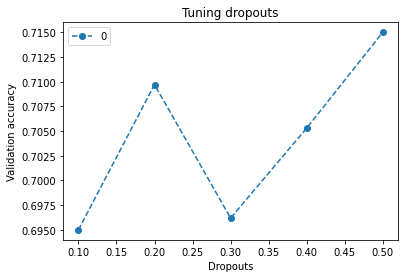

In [47]:
pd.DataFrame(dropout_accuracies.values(), index=dropout_accuracies.keys()).plot(
    title="Tuning dropouts", xlabel="Dropouts", ylabel="Validation accuracy", style = "--o"
);

## When finished
 - train on all training data (train and validation) with tuned parameters
 - evaluate on testing data